In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/LEGION/Desktop/Python Project/Ecommerce Customers")


In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


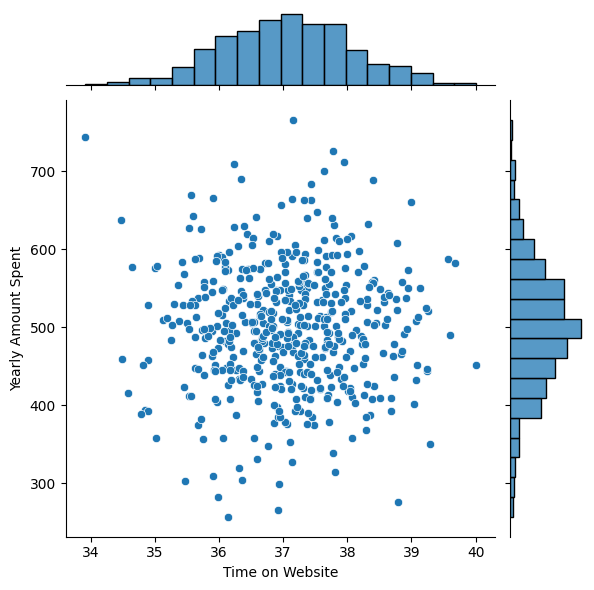

In [6]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df)

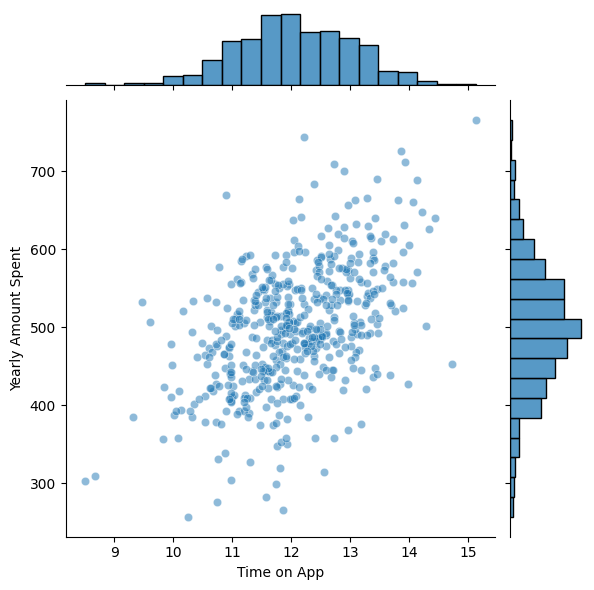

In [7]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df, alpha=0.5)

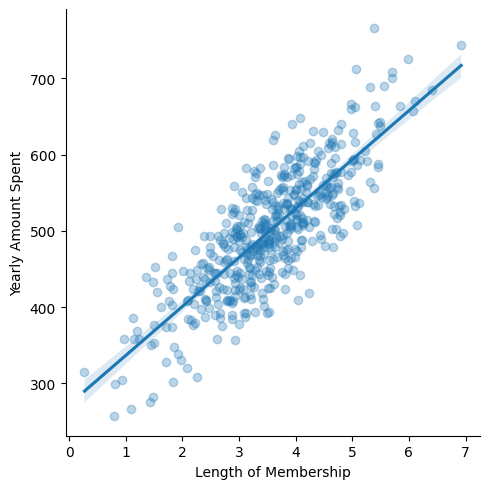

In [8]:
sns.lmplot(x= 'Length of Membership',
          y= 'Yearly Amount Spent',
           data = df,
          scatter_kws={'alpha':0.3})

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['Time on App', 'Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state= 42 )

In [12]:
X_test

,Time on App,Time on Website,Length of Membership
361,10.347877,39.045156,3.434560
73,12.817113,37.031539,3.851579
374,10.101632,38.043453,4.238296
155,13.457725,37.238806,2.941411
104,10.994224,38.074452,3.428860
...,...,...,...
266,11.777772,37.979827,3.784273
23,11.657576,36.772604,3.919302
222,11.109456,38.585855,3.892891
261,13.041245,36.655208,3.456234


In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
lm.coef_

array([38.60854346,  0.78562369, 62.55928792])

In [18]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['coef'])
print(cdf)

                           coef
Time on App           38.608543
Time on Website        0.785624
Length of Membership  62.559288


In [19]:
predictions = lm.predict(X_test)

In [20]:
predictions

array([429.47210171, 549.31218446, 469.45917026, 517.26864352,
       453.30743285, 586.77274082, 480.43964578, 507.87790281,
       424.42185231, 475.98961873, 470.09091211, 414.46445873,
       428.63754654, 487.01257302, 448.1500256 , 409.45375361,
       571.18066702, 479.50208277, 444.50723503, 483.66493466,
       460.11061419, 480.43797079, 527.63371392, 632.16176969,
       436.73240808, 503.55520124, 568.69314436, 528.72859582,
       429.36409196, 352.16513089, 513.97073363, 497.9897364 ,
       497.36719991, 317.14314417, 507.79503236, 472.15712634,
       543.92620023, 434.66394134, 469.50780249, 477.9911575 ,
       480.42766939, 426.87833886, 500.51404989, 514.65248448,
       497.32995695, 533.69902098, 559.53248572, 493.12170996,
       319.13483159, 471.82925757, 439.20574544, 495.41794949,
       602.50554948, 604.97133051, 602.81708635, 471.73760128,
       402.42393424, 477.47828545, 533.93141144, 512.76000721,
       502.91005133, 403.13108398, 488.30266824, 466.95

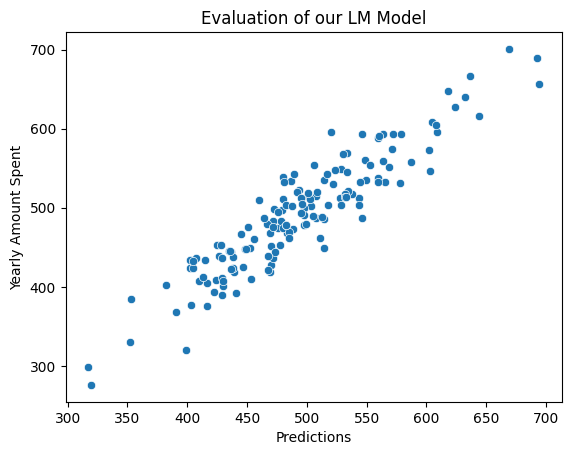

In [24]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.ylabel("Yearly Amount Spent")  # Adding a label for the y-axis
plt.title("Evaluation of our LM Model")
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [27]:
print("Mean Absloute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absloute Error:  22.57620980116825
Mean Squared Error:  758.6208936474467
RMSE:  27.543073424137813


In [28]:
residual = y_test - predictions

In [29]:
residual

361   -28.438966
73    -14.534996
374   -50.856428
155   -13.290264
104   -43.237822
         ...    
266    48.283953
23     10.763537
222    15.222142
261   -18.927602
426   -46.919237
Name: Yearly Amount Spent, Length: 150, dtype: float64

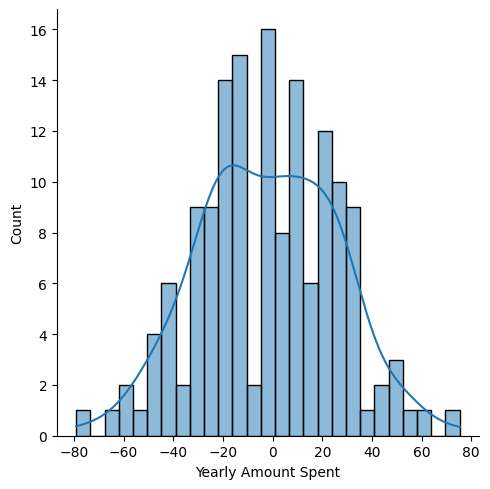

In [37]:
sns.displot(residual, bins = 27, kde = True)

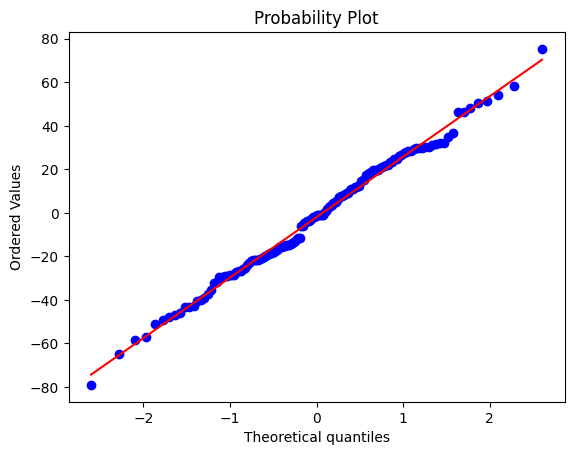

In [41]:
residuals = y_test - predictions

import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()
